Part 1: Upsample and Downsample

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

Making sample size for class 0 (900) and class 1 (100)

In [4]:
n_samples = 1000

class_0_ration = 0.9
class_0 = int(n_samples * class_0_ration)
class_1 = n_samples - class_0
class_0, class_1

(900, 100)

for np.random.normal(): https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html 

Making data frame using pandas and numpy

In [5]:
df_class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=class_0),
    'label': 0
})

df_class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=1, scale=1, size=class_1),
    'feature_2': np.random.normal(loc=1, scale=1, size=class_1),
    'label': 1
})
df_class_0.shape, df_class_1.shape

((900, 3), (100, 3))

Combining two dataset

In [6]:
df = pd.concat([df_class_0, df_class_1], ignore_index=True)
# df = pd.concat([df_class_0, df_class_1]).reset_index(drop=True)
df.sample(5), df.head(5)

(     feature_1  feature_2  label
 749  -1.406661   2.589564      0
 771  -0.562467  -0.366824      0
 71    1.538037  -0.681052      0
 899  -0.816936   0.021312      0
 242   0.504987  -0.150056      0,
    feature_1  feature_2  label
 0   0.496714   0.368673      0
 1  -0.138264  -0.393339      0
 2   0.647689   0.028745      0
 3   1.523030   1.278452      0
 4  -0.234153   0.191099      0)

In [7]:
# get unique labels
df['label'].unique(), df['label'].value_counts()

(array([0, 1]),
 label
 0    900
 1    100
 Name: count, dtype: int64)

Now split majority and minority

In [8]:
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]
len(df_majority), len(df_minority)

(900, 100)

the resample() function inside sklearn.utils, so importing this library

In [9]:
from sklearn.utils import resample

upsample

In [11]:
df_upsample_minority = resample(
    df_minority,
    replace = True,  
    n_samples = len(df_majority),
    random_state=42
)

In [12]:
df_upsample_minority

,feature_1,feature_2,label
951,2.775311,2.261922,1
992,0.563614,2.188913,1
914,0.731469,-0.801058,1
971,0.785079,-1.940389,1
960,0.865691,0.945106,1
...,...,...,...
952,-0.193637,0.094268,1
965,-0.662492,1.089581,1
976,0.437832,2.124113,1
942,0.451275,1.269127,1


down sample

In [13]:
df_downsample_majority = resample(
    df_majority,
    replace = False,  # sample with replacement
    n_samples = len(df_minority),
    random_state=42
)
df_downsample_majority

,feature_1,feature_2,label
70,0.361396,0.128104,0
827,-0.522860,0.808058,0
231,0.216459,0.421921,0
588,0.830336,-1.525656,0
39,0.196861,-0.564079,0
...,...,...,...
398,-0.114540,0.267392,0
76,0.087047,-0.452306,0
196,-0.883857,0.078635,0
631,1.529550,-1.768439,0


We make upsample for minority data and downsample for majority data to understand how it works.

Plot to see the differences

df.scatter(df['feature1'],df['feature2'])

In [16]:
df.head(5)

,feature_1,feature_2,label
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


<Axes: title={'center': 'Original Data Distribution'}, xlabel='feature_1', ylabel='feature_2'>

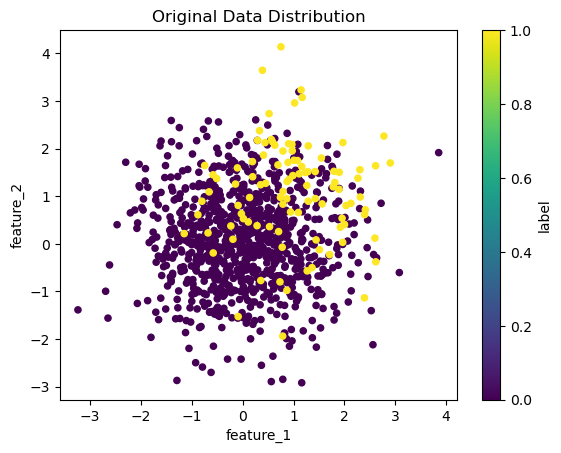

In [17]:
df.plot.scatter(
    x='feature_1',
    y='feature_2',
    c='label',
    colormap='viridis',
    title='Original Data Distribution'
)

In [18]:
df_balanced = pd.concat([df_upsample_minority, df_majority], ignore_index=True)
df_balanced['label'].value_counts()

label
1    900
0    900
Name: count, dtype: int64

<Axes: title={'center': 'Upsampled Minority Class'}, xlabel='feature_1', ylabel='feature_2'>

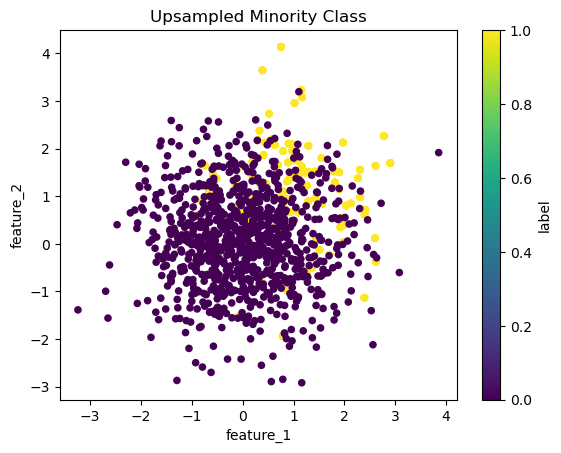

In [19]:
df_balanced.plot.scatter(
    x='feature_1',
    y='feature_2',
    c='label',
    colormap='viridis',
    title='Upsampled Minority Class'
)

Text(0.5, 1.0, 'Balanced Data Distribution')

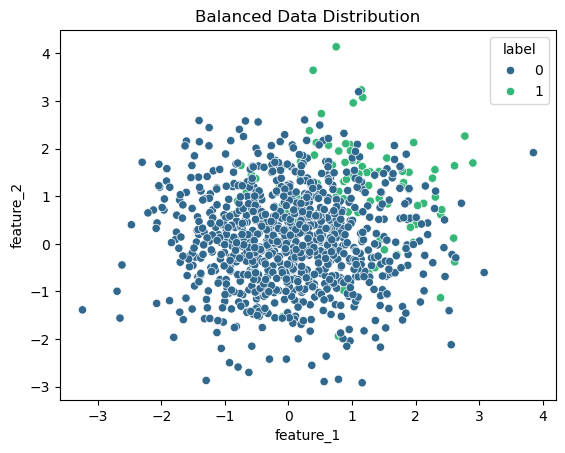

In [20]:
import seaborn as sns
sns.scatterplot(
    data=df_balanced,
    x='feature_1',
    y='feature_2',
    hue='label',
    palette='viridis'
).set_title('Balanced Data Distribution')

Text(0.5, 1.0, 'Unbalanced Data Distribution')

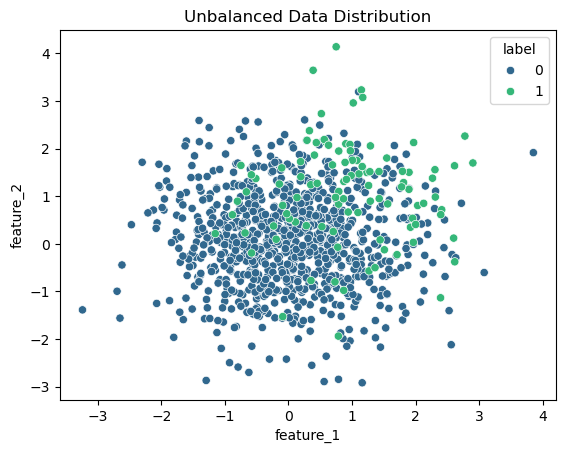

In [22]:
sns.scatterplot(
    data=df,
    x='feature_1',
    y='feature_2',
    hue='label',
    palette='viridis'
).set_title('Unbalanced Data Distribution')